False Positive Rate: 0.0558


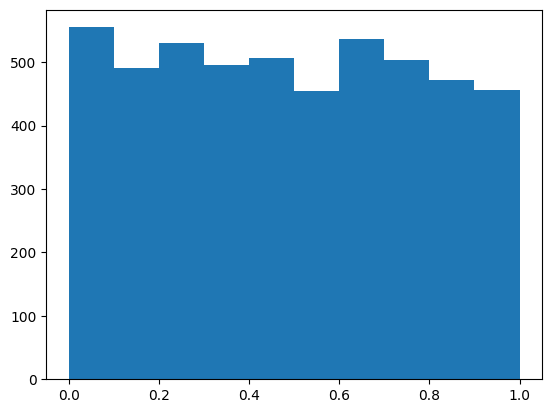

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# BÀI 2
def data_generate_bai2(n,p,true_beta): 
    X= np.random.normal(loc=0, scale =1, size=(n,p))
    true_beta=np.reshape(true_beta,(p,1))
    noise= np.random.normal(loc=0,scale=1, size=(n,1))
    y=np.dot(X,true_beta) + noise

    return X,y

def run():
    n = 100
    p = 5
    true_beta = [0.0, 0.0, 0.0, 0.0, 0.0]

    X, y =  data_generate_bai2(n, p, true_beta)
    XTX= np.dot(X.T,X)
    XTX_inver=np.linalg.inv(XTX)
    XTX_inverXT=np.dot(XTX_inver,X.T)
    beta_mu= np.dot(XTX_inverXT,y)

    beta_j= random.choice(beta_mu)
    T=beta_j.item()
    #print(T)
    for i in range(len(beta_mu)):
        if np.isclose(beta_mu[i][0], T):
            j= i
            break
    eta=XTX_inverXT[j].T
    etaTy_obs=np.dot(eta.T,y)
    Sigma_T=np.dot(eta.T,eta)
    
    cdf=norm.cdf(T,loc=0, scale=np.sqrt(np.dot(eta.T,eta)))
    p_value=2*min(cdf,1-cdf)
    return p_value
    

if __name__ =='__main__':
    max_iteration = 5000
    list_p_value = []

    alpha = 0.05
    count = 0

    for _ in range(max_iteration):
        p_value = run()
        list_p_value.append(p_value)

        if p_value <= alpha:
            count = count + 1

    print('False Positive Rate:', count / max_iteration)
    plt.hist(list_p_value)
    plt.show()

False Positive Rate: 0.121


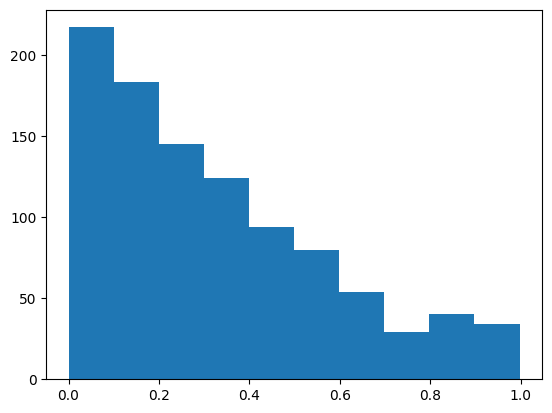

In [2]:
# BÀI 2_STAR
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random


def data_generate_bai2(n,p,true_beta): 
    X= np.random.normal(loc=0, scale =1, size=(n,p))
    true_beta=np.reshape(true_beta,(p,1))
    noise= np.random.normal(loc=0,scale=1, size=(n,1))
    y=np.dot(X,true_beta) + noise

    return X,y

def run():

    n = 100
    p = 5
    true_beta = [0.0, 0.0, 0.0, 0.0, 0.0]

    X, y =  data_generate_bai2(n, p, true_beta)
    XTX= np.dot(X.T,X)
    XTX_inver=np.linalg.inv(XTX)
    XTX_inverXT=np.dot(XTX_inver,X.T)
    beta_mu= np.dot(XTX_inverXT,y)
    
    j=np.argmax(beta_mu)
    eta=XTX_inverXT[j].T
    etaTy_obs=np.dot(eta.T,y).item()
    Sigma_T=np.dot(eta.T,eta).item()

    cdf=norm.cdf(etaTy_obs,loc=0, scale=np.sqrt(np.dot(eta.T,eta)))
    p_value=2*min(cdf,1-cdf)
    return p_value

if __name__ =='__main__':
    max_iteration = 1000
    list_p_value = []

    alpha = 0.05
    count = 0

    for _ in range(max_iteration):
        p_value = run()
        list_p_value.append(p_value)

        if p_value <= alpha:
            count = count + 1

    print('False Positive Rate:', count / max_iteration)
    plt.hist(list_p_value)
    plt.show()